# <code>bclr</code>

A package for <b>B</b>ayesian <b>C</b>hangepoint detection via <b>L</b>ogistic <b>R</b>egression.

These methods were developed in [Thomas, Jauch, and Matteson (2025)](https://arxiv.org/abs/2401.02917).

## Installation

To install the package (as of 1/14/25), clone the repository and then install via pip (Linux/Mac):

```
$ git clone https://github.com/manilasoldier/bclr.git
$ cd bclr
$ pip install .
```

or run

```
$ pip install git+https://github.com/manilasoldier/bclr.git
```

## Information on the package

Brief tutorials (as well as replication of some of our experiemnts can be seen in <code>bclr_examples.ipynb</code> and <code>bclr_multi_examples.ipynb</code> for the single and multiple changepoint settings. The experiments folder contains the code necessary to replicate some of our experiments. However, not all of the data is available for Experiments 1 and 2 because of size constraints. It can be made available upon request.


## Running the code

In [1]:
import bclr
import numpy as np

In [2]:
np.random.seed(800037)
a1 = np.random.standard_t(10, size=(320, 6))
a2 = np.random.standard_t(1.5, size=(480, 6))

# "Gaussian" type embedding
Xs = np.exp(-np.r_[a1, a2]**2)

Let's first investigate the single changepoint setup, before moving the multiple one. 

First, let's specify a prior for the $\beta$ coefficients (we need to provide a mean and covariance for the single changepoint setup).

### Single changepoint setup

In [3]:
rng1 = np.random.default_rng(800037) #for reproducibility
prior_covS = np.diag(np.repeat(3, 6))
prior_mean = np.repeat(0, 6)

bclrS = bclr.BayesCC(X = Xs, prior_mean = prior_mean, prior_cov = prior_covS, 
                     n_iter = 2000)
bclrS.fit(rng = rng1)
bclrS.transform(verbose=False)

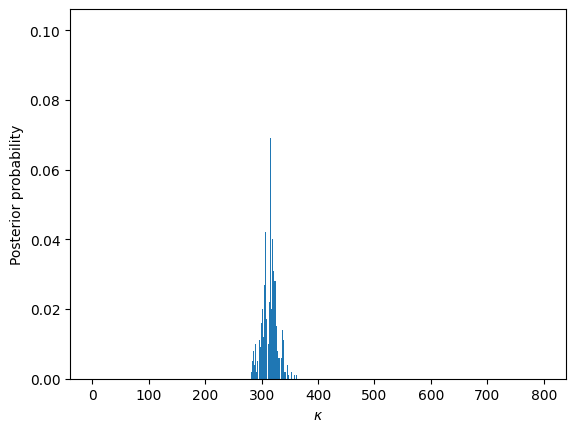

In [4]:
bclrS.plot_k()

### Multiple changepoint setup

Now we consider the multiple changepoint setup and the whole series $X$, where specify $J = 10$ (i.e. <code>cps=10</code>). 

Then, we will go ahead and fit <code>bclr</code> to the data and estimate (predict) the changes. 

Note: there is no need to specify a prior_mean for the multiple changepoint setup.

In [5]:
np.random.seed(199203)
b1 = np.random.randn(100, 10)
b2 = np.random.randn(80, 10) + np.broadcast_to(np.random.randn(10), (80, 10))
b3 = np.random.randn(140, 10) + np.broadcast_to(np.random.randn(10), (140, 10))
b4 = np.random.randn(80, 10) + np.broadcast_to(np.random.randn(10), (80, 10))

Xm = np.r_[b1, b2, b3, b4]

In [8]:
rng2 = np.random.default_rng(199203) #for reproducibility
prior_covM = np.diag(np.repeat(3, 10))
bclrM = bclr.MultiBayesCC(X = Xm, cps = 10, prior_cov = prior_covM, 
                          rng = rng2, warnings=False)
cps = bclrM.fit_predict()

Now we can look at
- where the changes are estimated to be located, 
- the posterior probability of the estimates, and 
- the normalized entropy of the segment distribution.

In [9]:
print(cps)

   Location  Posterior Probability  Normalized Entropy
0      99.0                  0.946            0.047544
1     180.0                  1.000            0.000000
2     320.0                  0.996            0.005354
